<a href="https://colab.research.google.com/github/adralbuq/Free-Flight-Optimization/blob/main/Free_Flight_Optimization_(Otimiza%C3%A7%C3%A3o_de_voo_livre)_Projeto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
!pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
import pandas as pd
import random
from deap import base
from deap import creator
from deap import tools

In [71]:
df = pd.read_excel('/content/Condicoes_para_voo.xlsx')
df

,Tabela 1 - Veloc. do Vento,e Condições para,Voo Livre
0,m/s,Designação,Status
1,0 - 0.2...,Calmaria,Vento perfeito
2,0.3... - 1.5...,Aragem leve,Vento perfeito
3,1.6... - 3.3...,Brisa leve,Vento perfeito
4,3.4... - 5.4...,Brisa suave,Vento perfeito
5,5.5... - 7.9...,Brisa moderada,Condição não ideal
6,8.0... - 10.7...,Brisa fresca,Condição não ideal
7,10.8... - 13.8...,Brisa forte,Condição não ideal
8,13.9... - 17.1...,Vendaval próximo,Sem condições de voo
9,17.2... - 20.7...,Vendaval,Sem condições de voo


In [72]:
df = pd.read_csv('/content/velocidade_do_vento.csv', sep=',')

display(df)

,DATA,LOCAL,VELOCIDADE DO VENTO
0,28/11/2020,VYVGI,13.5
1,28/11/2020,USQAC,23.9
2,28/11/2020,IPWXM,16.6
3,28/11/2020,DENKA,6.2
4,28/11/2020,HUUUZ,2.9
...,...,...,...
65531,05/06/2020,MLVGY,3.5
65532,05/06/2020,DKVRB,20.3
65533,05/06/2020,BNVFU,30.8
65534,05/06/2020,ANYUE,11.2


In [73]:
datas = list(df['DATA'].unique())
len(datas)

256

In [74]:
locais = list(df['LOCAL'].unique())
len(locais)

256

In [75]:
def plot_generations(generation, average, minimum, maximum):
    pyplot.figure(figsize=(16, 8))
    pyplot.grid(True)
    pyplot.plot(generation, average, label="average")
    pyplot.plot(generation, minimum, label="minimum")
    pyplot.plot(generation, maximum, label="maximum")
    pyplot.xlabel("Generation")
    pyplot.ylabel("Fitness")
    pyplot.ylim(-1)
    pyplot.legend(loc="upper right")
    pyplot.show()

In [76]:
def eval(individual):
  data_bin = ''
  local_bin = ''

  for i in range(0,8):
    data_bin += str(individual[i])
  for i in range(8,16):
    local_bin += str(individual[i])

  data = int(data_bin, 2)
  local = int(local_bin, 2)
  df1 = df.loc[(df['DATA'] == datas[data]) & (df['LOCAL'] == locais[local])]
  value = float(df1.iloc[0][['VELOCIDADE DO VENTO']])
  
  return value,    

In [77]:
data_local = []

In [78]:
for i, j in df.iterrows():
  tupla = (j['DATA'], j['LOCAL'])
  if tupla not in data_local:
    data_local.append(tupla)

In [79]:
len(data_local)

65536

In [80]:
def gerador(a,b,c,d):
  encontrei = False
  
  while not encontrei:
    data = random.randint(a,b)
    local = random.randint(c,d)
    tupla = (datas[data],locais[local])
    if tupla in data_local:
      encontrei = True

  data = "{0:b}".format(data)
  local = "{0:b}".format(local)

  falta_data = 8 - len(data)
  falta_local = 8 - len(local)

  data = '0'*falta_data + data
  local = '0'*falta_local + local

  retorno = []

  for i in data:
    retorno.append(int(i))
  for i in local:
    retorno.append(int(i))

  return retorno  


In [81]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

toolbox.register("attr_bool", gerador, 0, 255, 0, 255)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attr_bool)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", eval)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [82]:
import numpy
from deap import algorithms
import random
import matplotlib.pyplot as pyplot

In [83]:
def main():
   # random.seed(64)
    
    pop = toolbox.population(n=200)
    CXPB, MUTPB, GEN = 0.5, 0.2, 50

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("Avg", numpy.mean)
    stats.register("Std", numpy.std)
    stats.register("Min", numpy.min)
    stats.register("Max", numpy.max)

    hof = tools.HallOfFame(1)

    _, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=GEN, stats=stats,
                                     halloffame=hof, verbose=True)

    record = stats.compile(pop)
    print("### Velocidade do vento mínima:", record["Min"], "### Condição ótima para voo. Vento perfeito!")

    plot_generations(*logbook.select("gen", "Avg", "Min", "Max"))

    return pop, stats, hof

gen	nevals	Avg    	Std    	Min	Max 
0  	200   	16.3195	9.73295	0.4	32.8
1  	122   	11.8925	8.59538	0.4	32.1
2  	109   	9.8015 	8.69092	0.2	31.8
3  	120   	8.992  	9.56538	0.2	32.7
4  	123   	8.752  	9.60523	0.2	32.3
5  	110   	8.4035 	10.2106	0.2	32.7
6  	110   	8.5985 	10.6976	0.2	32.1
7  	119   	8.0255 	10.2431	0.2	32.7
8  	118   	7.7745 	10.5522	0.2	31.8
9  	128   	8.761  	10.776 	0.2	32.7
10 	114   	7.574  	10.1158	0.2	31.8
11 	120   	4.946  	8.6895 	0.2	30.8
12 	117   	2.45   	6.55755	0.2	32.1
13 	128   	2.1795 	6.38287	0.2	32.6
14 	134   	2.1515 	6.31847	0.2	31.7
15 	122   	2.568  	7.19345	0.2	31.1
16 	107   	1.871  	5.93878	0.2	30.9
17 	118   	1.895  	6.21985	0.2	32.6
18 	118   	1.993  	6.16283	0.2	32.6
19 	111   	1.611  	4.95861	0.2	30.7
20 	124   	2.4545 	6.61283	0.2	32.6
21 	125   	3.3225 	8.2229 	0.2	32.6
22 	118   	2.422  	6.10391	0.2	32.6
23 	119   	2.0435 	6.19956	0.2	32.6
24 	122   	2.387  	6.38019	0.2	32.6
25 	124   	3.482  	8.02134	0.2	32.6
26 	130   	2.2265 	6.71216	0

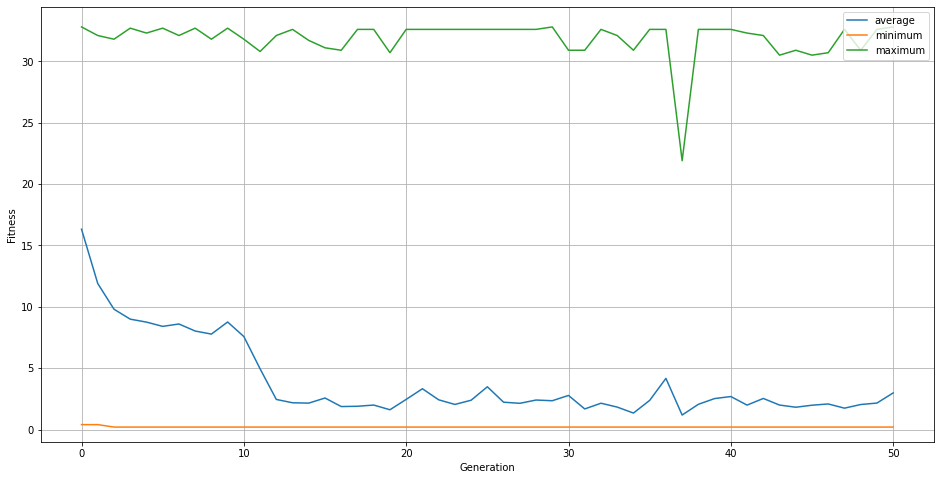

In [84]:
if __name__ == "__main__":
    _, __, hof = main()   

In [85]:
hof[0]

[1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0]

In [86]:
data_bin = ''
local_bin = ''

for i in range(0,8):
  data_bin += str(hof[0][i])
for i in range(8,16):
  local_bin += str(hof[0][i])

data = int(data_bin, 2)
local = int(local_bin, 2)

In [87]:
data

214

In [88]:
local

234

In [89]:
df1 = df.loc[(df['DATA'] == datas[data]) & (df['LOCAL'] == locais[local])]
df1

,DATA,LOCAL,VELOCIDADE DO VENTO
55018,09/08/2020,EDPGQ,0.2
